
# Empowering Females: A Look into the Progress of Countries

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#gather">Data Gathering</a></li>
    <li><a href="#assess">Data Assessment</a></li>
    <li><a href="#clean">Data Cleaning</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
        <ul>
    <li><a href="#q1">Research Question 1</a></li>
    <li><a href="#q2">Research Question 2</a></li>
    <li><a href="#q3">Research Question 3</a></li>
    <li><a href="#q4">Research Question 4</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Female empowerment has become an essential cornerstone of the success of societies and their development. Achieving gender equality and empowerment of all women and girls is stated as the 6th Sustainable Development Goal (SDGs) by the United Nations (UN) for all nations to reach by 2030. 

In this project, we investigate the performance of countries regarding the empowerment of women to make their own informed decisions and choices in life. We use some of the indicators set by the UN to measure how far countries have come regarding achieving this SDG. The indicators we look at are as follows:

<ul>
<li> Participation of women in household decision-making, which is the main variable of interest.  </li>
<li> Mean years in school for women between 15 and 24 years old. (independent variable) </li>
<li> Percentage of women first married before the age of 18.  (independent variable) </li>
<li> Proportion of women subjected to violence in the past 12 months. (independent variable) </li>
<li> Employment rate of females aged 15-24 years.  (independent variable) </li>
</ul>

The data will be downloaded from [Gapmider](https://www.gapminder.org/data/) and the analysis will focus on the year 2015 given that is the year with the most recent data available on the website.

The research questions for this project is fourfold:

<ol>
<li> Which countries have the best/worst progress regarding participation of women in decision making, years of schooling and employment?  </li>
<li> Which countries have lowest/highest rates of womem marriages before the age of 18 and violence? </li>
<li> Which indicator has the highest correlation with the variable of interest? </li>
<li> How do the independent variables affect the variable of interest? </li>
 
</ol>


In [1]:
# Packages that will be used
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import requests
import os
import seaborn as sn
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


<a id='wrangling'></a>
## Data Wrangling



<a id='gather'></a>
### Data Gathering and Loading

All data has been downloaded manually from the [Gapmider](https://www.gapminder.org/data/) website, as there is no option from programatic downloading.

In [2]:
WomenParticipateInDecisions = pd.read_csv('sg_dmk_alld_fn_zs.csv')
WomenParticipateInDecisions.head()

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32.6,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.7
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.4,NaN,NaN
3,Armenia,NaN,50.1,NaN,NaN,NaN,NaN,71.6,NaN,NaN,...,NaN,81.7,NaN,NaN,NaN,NaN,NaN,77.1,NaN,NaN
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
WomenSubjectedtoViolence = pd.read_csv('sg_vaw_1549_zs.csv')
WomenSubjectedtoViolence.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.1,NaN,NaN
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.9,NaN
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN
3,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
WomenMarriedBy18 =  pd.read_csv('sp_m18_2024_fe_zs.csv')
WomenMarriedBy18.head()

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40.4,NaN,NaN,32.8,34.8,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.3,NaN,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.2,NaN,NaN,NaN,NaN,NaN,5.3,NaN,NaN


In [5]:
MeanSchoolYears = pd.read_csv('mean_years_in_school_women_15_to_24_years.csv')
MeanSchoolYears.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.48,0.50,0.51,0.53,0.55,0.57,0.59,0.61,0.63,...,1.60,1.66,1.71,1.77,1.82,1.88,1.94,2.00,2.07,2.13
1,Albania,4.99,5.11,5.24,5.36,5.49,5.62,5.75,5.88,6.02,...,10.20,10.40,10.50,10.70,10.90,11.00,11.20,11.40,11.50,11.70
2,Algeria,3.61,3.71,3.82,3.93,4.04,4.15,4.27,4.39,4.51,...,8.78,8.94,9.11,9.28,9.45,9.62,9.78,9.95,10.10,10.30
3,Andorra,9.50,9.67,9.84,10.00,10.20,10.30,10.50,10.70,10.80,...,15.00,15.10,15.30,15.40,15.50,15.60,15.70,15.80,16.00,16.10
4,Angola,1.64,1.69,1.74,1.80,1.85,1.91,1.97,2.03,2.10,...,4.77,4.90,5.03,5.16,5.30,5.43,5.57,5.71,5.85,6.00


In [6]:
EmployRate = pd.read_csv('females_aged_15_24_employment_rate_percent.csv')
EmployRate.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0.128,0.131,0.1280,0.127,0.1290,0.1280,0.1270,0.1270,0.1270,...,0.1540,0.1620,0.1710,0.1790,0.1800,0.1820,0.183,0.1840,0.1850,0.1860
1,Albania,0.425,0.423,0.3800,0.375,0.3640,0.3700,0.4030,0.3720,0.3520,...,0.1490,0.1380,0.1330,0.1570,0.1640,0.1600,0.162,0.1630,0.1630,0.1620
2,Algeria,0.107,0.102,0.0959,0.091,0.0797,0.0853,0.0868,0.0789,0.0707,...,0.0622,0.0506,0.0476,0.0507,0.0505,0.0498,0.049,0.0481,0.0468,0.0451
3,Angola,0.254,0.257,0.2570,0.251,0.2420,0.2430,0.2460,0.2470,0.2480,...,0.4780,0.4770,0.4760,0.4660,0.4590,0.4520,0.446,0.4410,0.4370,0.4330
4,Argentina,0.337,0.324,0.2660,0.251,0.1750,0.2010,0.2160,0.2510,0.2420,...,0.2390,0.2320,0.2290,0.2210,0.2170,0.2170,0.216,0.2100,0.2040,0.2000


<a id='assess'></a>
### Assessing Data

We take a quick look at our dataframes and the available data.

In [7]:
WomenParticipateInDecisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  69 non-null     object 
 1   1999     1 non-null      float64
 2   2000     8 non-null      float64
 3   2001     5 non-null      float64
 4   2002     3 non-null      float64
 5   2003     8 non-null      float64
 6   2004     6 non-null      float64
 7   2005     10 non-null     float64
 8   2006     11 non-null     float64
 9   2007     9 non-null      float64
 10  2008     7 non-null      float64
 11  2009     8 non-null      float64
 12  2010     10 non-null     float64
 13  2011     9 non-null      float64
 14  2012     14 non-null     float64
 15  2013     10 non-null     float64
 16  2014     10 non-null     float64
 17  2015     8 non-null      float64
 18  2016     12 non-null     float64
 19  2017     7 non-null      float64
 20  2018     8 non-null      float64
dtypes: float64(20), ob

In [8]:
# Which countries have non null values for the year 2015?

## Here we extract the names of countries that have non null values for the year 2015 and convert them to a list
available_WomenParticipateInDecisions = WomenParticipateInDecisions['country'][pd.notna(WomenParticipateInDecisions['2015'])].tolist()

## Print list of countries
# source: https://stackoverflow.com/questions/4440516/in-python-is-there-an-elegant-way-to-print-a-list-in-a-custom-format-without-ex
print('Data for the following {} countries is available:'.format(str(len(available_WomenParticipateInDecisions))), *available_WomenParticipateInDecisions, sep='\n- ')

Data for the following 8 countries is available:
- Afghanistan
- Chad
- Colombia
- Guatemala
- Mozambique
- Rwanda
- Senegal
- Zimbabwe


In [9]:
WomenSubjectedtoViolence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  106 non-null    object 
 1   2000     1 non-null      float64
 2   2001     0 non-null      float64
 3   2002     0 non-null      float64
 4   2003     0 non-null      float64
 5   2004     0 non-null      float64
 6   2005     2 non-null      float64
 7   2006     4 non-null      float64
 8   2007     3 non-null      float64
 9   2008     4 non-null      float64
 10  2009     4 non-null      float64
 11  2010     2 non-null      float64
 12  2011     3 non-null      float64
 13  2012     35 non-null     float64
 14  2013     7 non-null      float64
 15  2014     12 non-null     float64
 16  2015     8 non-null      float64
 17  2016     14 non-null     float64
 18  2017     7 non-null      float64
dtypes: float64(18), object(1)
memory usage: 15.9+ KB


In [10]:
# Which countries have non null values for the year 2015?
available_WomenSubjectedtoViolence = WomenSubjectedtoViolence['country'][pd.notna(WomenSubjectedtoViolence['2015'])].tolist()

## Print list of countries
print('Data for the following {} countries is available:'.format(str(len(available_WomenSubjectedtoViolence))), *available_WomenSubjectedtoViolence , sep='\n- ')

Data for the following 8 countries is available:
- Afghanistan
- Bangladesh
- Chad
- Colombia
- Guatemala
- Mozambique
- Rwanda
- Zimbabwe


In [11]:
WomenMarriedBy18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  126 non-null    object 
 1   1985     1 non-null      float64
 2   1986     6 non-null      float64
 3   1987     10 non-null     float64
 4   1988     6 non-null      float64
 5   1989     3 non-null      float64
 6   1990     5 non-null      float64
 7   1991     4 non-null      float64
 8   1992     11 non-null     float64
 9   1993     7 non-null      float64
 10  1994     6 non-null      float64
 11  1995     8 non-null      float64
 12  1996     10 non-null     float64
 13  1997     10 non-null     float64
 14  1998     10 non-null     float64
 15  1999     11 non-null     float64
 16  2000     13 non-null     float64
 17  2001     6 non-null      float64
 18  2002     7 non-null      float64
 19  2003     12 non-null     float64
 20  2004     11 non-null     float64
 21  2005     26 non-

In [12]:
# Which countries have non null values for the year 2015?
available_WomenMarriedBy18 = WomenMarriedBy18['country'][pd.notna(WomenMarriedBy18['2015'])].tolist()

## Print list of countries
print('Data for the following {} countries is available:'.format(str(len(available_WomenMarriedBy18))), *available_WomenMarriedBy18 , sep='\n- ')

Data for the following 19 countries is available:
- Afghanistan
- Bolivia
- Chad
- Colombia
- Congo, Rep.
- Guatemala
- Kazakhstan
- Malawi
- Mali
- Mauritania
- Mexico
- Mozambique
- Myanmar
- Peru
- Rwanda
- Senegal
- Solomon Islands
- Thailand
- Zimbabwe


In [13]:
MeanSchoolYears.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  187 non-null    object 
 1   1970     187 non-null    float64
 2   1971     187 non-null    float64
 3   1972     187 non-null    float64
 4   1973     187 non-null    float64
 5   1974     187 non-null    float64
 6   1975     187 non-null    float64
 7   1976     187 non-null    float64
 8   1977     187 non-null    float64
 9   1978     187 non-null    float64
 10  1979     187 non-null    float64
 11  1980     187 non-null    float64
 12  1981     187 non-null    float64
 13  1982     187 non-null    float64
 14  1983     187 non-null    float64
 15  1984     187 non-null    float64
 16  1985     187 non-null    float64
 17  1986     187 non-null    float64
 18  1987     187 non-null    float64
 19  1988     187 non-null    float64
 20  1989     187 non-null    float64
 21  1990     187 non

In [14]:
# Which countries have non null values for the year 2015?
available_MeanSchoolYears = MeanSchoolYears['country'][pd.notna(MeanSchoolYears['2015'])].tolist()

## Print list of countries
print('Data for the following {} countries is available:'.format(str(len(available_MeanSchoolYears))), *available_MeanSchoolYears , sep='\n- ')

Data for the following 187 countries is available:
- Afghanistan
- Albania
- Algeria
- Andorra
- Angola
- Antigua and Barbuda
- Argentina
- Armenia
- Australia
- Austria
- Azerbaijan
- Bahamas
- Bahrain
- Bangladesh
- Barbados
- Belarus
- Belgium
- Belize
- Benin
- Bhutan
- Bolivia
- Bosnia and Herzegovina
- Botswana
- Brazil
- Brunei
- Bulgaria
- Burkina Faso
- Burundi
- Cambodia
- Cameroon
- Canada
- Cape Verde
- Central African Republic
- Chad
- Chile
- China
- Colombia
- Comoros
- Congo, Dem. Rep.
- Congo, Rep.
- Costa Rica
- Cote d'Ivoire
- Croatia
- Cuba
- Cyprus
- Czech Republic
- Denmark
- Djibouti
- Dominica
- Dominican Republic
- Ecuador
- Egypt
- El Salvador
- Equatorial Guinea
- Eritrea
- Estonia
- Eswatini
- Ethiopia
- Fiji
- Finland
- France
- Gabon
- Gambia
- Georgia
- Germany
- Ghana
- Greece
- Grenada
- Guatemala
- Guinea
- Guinea-Bissau
- Guyana
- Haiti
- Honduras
- Hungary
- Iceland
- India
- Indonesia
- Iran
- Iraq
- Ireland
- Israel
- Italy
- Jamaica
- Japan
- Jord

In [15]:
EmployRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  179 non-null    object 
 1   1991     179 non-null    float64
 2   1992     179 non-null    float64
 3   1993     179 non-null    float64
 4   1994     179 non-null    float64
 5   1995     179 non-null    float64
 6   1996     179 non-null    float64
 7   1997     179 non-null    float64
 8   1998     179 non-null    float64
 9   1999     179 non-null    float64
 10  2000     179 non-null    float64
 11  2001     179 non-null    float64
 12  2002     179 non-null    float64
 13  2003     179 non-null    float64
 14  2004     179 non-null    float64
 15  2005     179 non-null    float64
 16  2006     179 non-null    float64
 17  2007     179 non-null    float64
 18  2008     179 non-null    float64
 19  2009     179 non-null    float64
 20  2010     179 non-null    float64
 21  2011     179 non

In [16]:
# Which countries have non null values for the year 2015?
available_EmployRate = EmployRate['country'][pd.notna(EmployRate['2015'])].tolist()

## Print list of countries
print('Data for the following {} countries is available:'.format(str(len(available_EmployRate))), *available_EmployRate , sep='\n- ')

Data for the following 179 countries is available:
- Afghanistan
- Albania
- Algeria
- Angola
- Argentina
- Armenia
- Australia
- Austria
- Azerbaijan
- Bahamas
- Bahrain
- Bangladesh
- Barbados
- Belarus
- Belgium
- Belize
- Benin
- Bhutan
- Bolivia
- Bosnia and Herzegovina
- Botswana
- Brazil
- Brunei
- Bulgaria
- Burkina Faso
- Burundi
- Cambodia
- Cameroon
- Canada
- Cape Verde
- Central African Republic
- Chad
- Chile
- China
- Colombia
- Comoros
- Congo, Dem. Rep.
- Congo, Rep.
- Costa Rica
- Cote d'Ivoire
- Croatia
- Cuba
- Cyprus
- Czech Republic
- Denmark
- Djibouti
- Dominican Republic
- Ecuador
- Egypt
- El Salvador
- Equatorial Guinea
- Eritrea
- Estonia
- Eswatini
- Ethiopia
- Fiji
- Finland
- France
- Gabon
- Gambia
- Georgia
- Germany
- Ghana
- Greece
- Guatemala
- Guinea
- Guinea-Bissau
- Guyana
- Haiti
- Honduras
- Hungary
- Iceland
- India
- Indonesia
- Iran
- Iraq
- Ireland
- Israel
- Italy
- Jamaica
- Japan
- Jordan
- Kazakhstan
- Kenya
- Kuwait
- Kyrgyz Republic
- 

There is obviously a huge discrepancy in the number of observations available for each indicator which will cause a problem in the significance of the statistical analysis we perform. However, since there is no workaround to this problem, we proceed by extracting the countries for which data is available for all indicators.

In [17]:
# What are the common countries available in all lists??

## source: https://stackoverflow.com/questions/57210753/find-common-values-in-multiple-lists

common_countries = list(set.intersection(*map(set, [available_WomenParticipateInDecisions, available_WomenSubjectedtoViolence,
                                                    available_WomenMarriedBy18, available_MeanSchoolYears,
                                                   available_EmployRate ])))

print('There are {} common countries in all dataframes:\n'.format(str(len(common_countries)))+
     '\n'.join(['{}-{}'.format(i, val) for i, val in (enumerate(common_countries, start=1))]))


There are 7 common countries in all dataframes:
1-Guatemala
2-Chad
3-Afghanistan
4-Zimbabwe
5-Mozambique
6-Colombia
7-Rwanda


#### Documenting Quality Issues:

1. There are many missing data in the `WomenParticipateInDecisions` and `WomenSubjectedtoViolence` dataframes compared to the other datasets. This issue is certainly going to affect the statistical power of the analytical results but there is no solution that can be done to fix this incompleteness issue.
2. All dataframes need to be filtered to include only the country and 2015 columns.

#### Documenting Tidiness Issues:
1. All our 5 variables have the same observational unit (i.e. countries) and therefore have to be merged together.

<a id='clean'></a>
### Data Cleaning

In [18]:
# Create copies of original dataframes
WomenParticipateInDecisions_clean = WomenParticipateInDecisions.copy()
WomenSubjectedtoViolence_clean = WomenSubjectedtoViolence.copy()
WomenMarriedBy18_clean = WomenMarriedBy18.copy()
MeanSchoolYears_clean = MeanSchoolYears.copy()
EmployRate_clean = EmployRate.copy()

**Solving Quality Issues:**

- Define:
  1. Our analysis focuses only on the year 2015, and dataframes contain data for other irrelevant years.
  2. Keep only columns for the country and year 2015 and delete others.
  3. Rename column to be the title of the indicator.

In [19]:
# Code:
#      - Select country and 2015 column
#      - Rename 2015 column to indicator title

Indicators= { "WomenParticipateInDecisions_clean" : "Participation in Decision", 
              "WomenSubjectedtoViolence_clean" : "Subject to Violence",
             "WomenMarriedBy18_clean" :"Married by 18", 
             "MeanSchoolYears_clean" : "Mean School Years" ,
              "EmployRate_clean" : "Employment Rate"}

## Define a function to do cleaning steps programatically 
def clean (df):
    # Get name of dataframe: https://stackoverflow.com/questions/31727333/get-the-name-of-a-pandas-dataframe
    name =[x for x in globals() if globals()[x] is df][0]
    Newdf = pd.DataFrame()
    Newdf['Country'] = df["country"]
    Newdf[Indicators[name]] = df["2015"]
    return Newdf

## Clean each dataframe
df1 = clean(WomenParticipateInDecisions_clean)
df2 = clean(WomenSubjectedtoViolence_clean)
df3 = clean(WomenMarriedBy18_clean)
df4 = clean(MeanSchoolYears_clean)
df5 = clean(EmployRate_clean)


In [20]:
# Test
df3.head() #looks good!

,Country,Married by 18
0,Afghanistan,34.8
1,Albania,NaN
2,Algeria,NaN
3,Angola,NaN
4,Armenia,NaN


**Solving tidiness issues:**

- Define:
  1. Observational unit in all dataframes are the same (countries).
  2. Merge dataframes into one dataframe with columns corresponding to country name and indicator titles.

In [21]:
# Code
# Merge multiple dataframes: https://stackoverflow.com/questions/55652704/merge-multiple-dataframes-pandas
dfs = [df.set_index(['Country']) for df in [df1, df2, df3, df4, df5]]

df = pd.concat(dfs, axis=1, sort=True).reset_index()

In [22]:
# Test
df.head() #looks good!

,index,Participation in Decision,Subject to Violence,Married by 18,Mean School Years,Employment Rate
0,Afghanistan,32.6,46.1,34.8,2.13,0.1710
1,Albania,NaN,NaN,NaN,11.70,0.1330
2,Algeria,NaN,NaN,NaN,10.30,0.0476
3,Andorra,NaN,NaN,NaN,16.10,NaN
4,Angola,NaN,NaN,NaN,6.00,0.4760


In [23]:
# Drop all NaN values
df = df.dropna()

In [24]:
print(df)

           index  Participation in Decision  Subject to Violence  \
0    Afghanistan                       32.6                 46.1   
33          Chad                       17.4                 17.5   
36      Colombia                       72.1                 18.4   
68     Guatemala                       63.1                  8.9   
114   Mozambique                       64.7                 15.5   
141       Rwanda                       65.4                 20.7   
189     Zimbabwe                       72.1                 19.9   

     Married by 18  Mean School Years  Employment Rate  
0             34.8               2.13            0.171  
33            66.9               2.66            0.501  
36            23.4              11.20            0.336  
68            29.5               7.60            0.281  
114           52.9               4.94            0.431  
141            6.8               5.86            0.752  
189           32.4              10.80            0.616  

In [25]:
# Save new dataframe for future use
df.to_csv('clean_df.csv')

Now that our dataframe is tidy and clean, we can proceed to the analysis.

<a id='eda'></a>
## Exploratory Data Analysis

In this part, we will tackle each research question in details. It should be noted that the number of observations is very small and will affect the power and significance of the analysis.



<a id='q1'></a>
### Question 1: Which countries have the best/worst progress regarding participation of women in decision making, years of schooling and employment?


To explore the performance of countries regarding the three variables `Participation in Decision`, `Mean School Years` and `Employment Rate`, we make a grouped bar chart with labels for comparison.

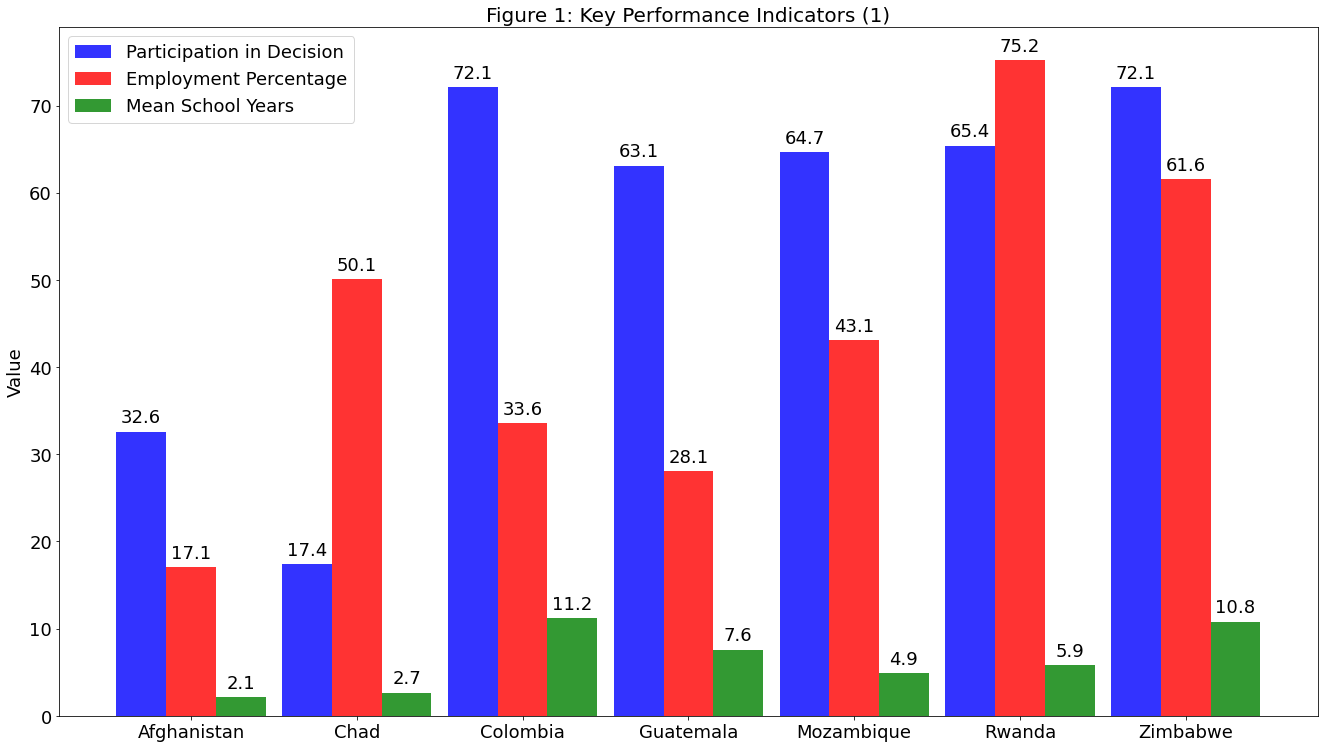

In [26]:
#####################
#### CREATE PLOT ####
#####################

# Source: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

n_groups = len(df)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, df['Participation in Decision'], bar_width,
alpha=opacity,
color='b',
label='Participation in Decision')

rects2 = plt.bar(index + bar_width, df['Employment Rate']*100, bar_width,
alpha=opacity,
color='r',
label='Employment Percentage')

rects3 = plt.bar(index + 2*bar_width, df['Mean School Years'], bar_width,
alpha=opacity,
color='g',
label='Mean School Years')


#plt.xlabel('Country', fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.title('Figure 1: Key Performance Indicators (1)' ,fontsize=20)
plt.xticks(index + bar_width,df['index'], fontsize=18 )
plt.yticks(fontsize=18 )
plt.legend(fontsize=18 )

#######################################
### ADDING VALUE LABELS TO BAR PLOT ###
#######################################

# Source: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            fontsize=18,                # Label fontsize
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

##############
#### PLOT ####
##############
            
# Call the function above. 
add_value_labels(ax)

plt.tight_layout()
plt.show()


From figure 1, we can see that **Colombia** and **Zimbabwe** have the *highest* percentage of women ***participating in decisions relating to the household***. They also happen to be the *highest* two countries in terms of the ***mean years of schooling***. 

Surprisingly, **Rwanda** is the country with the ***highest female employment percentage***, followed by **Zimbabwe**.

<a id='q2'></a>
### Question 2: Which countries have lowest/highest rates of womem marriages before the age of 18 and violence?

To explore the performance of countries regarding the two variables `Subject to Violence` and `Married by 18`, we make a grouped bar chart with labels for comparison.

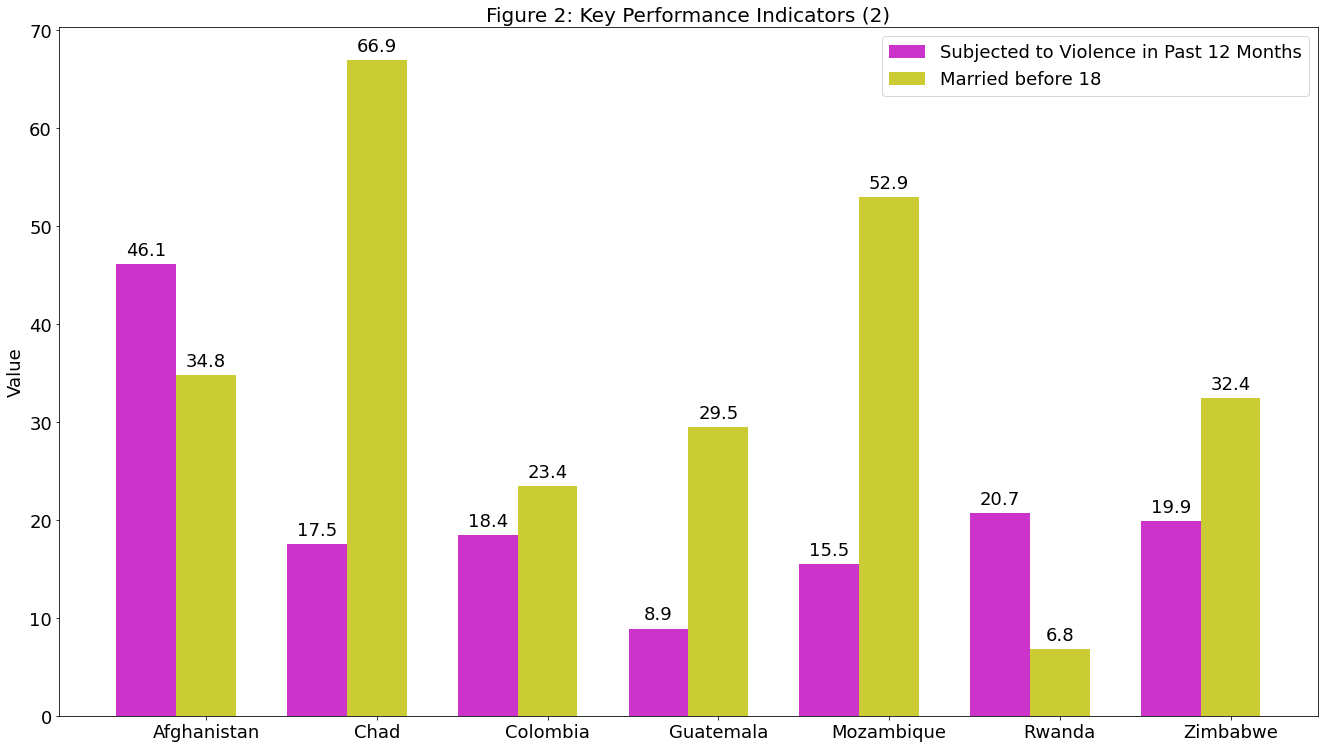

In [27]:
#####################
#### CREATE PLOT ####
#####################

n_groups = len(df)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df['Subject to Violence'], bar_width,
alpha=opacity,
color='m',
label='Subjected to Violence in Past 12 Months')

rects2 = plt.bar(index + bar_width, df['Married by 18'], bar_width,
alpha=opacity,
color='y',
label='Married before 18')


#plt.xlabel('Country', fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.title('Figure 2: Key Performance Indicators (2)' ,fontsize=20)
plt.xticks(index + bar_width,df['index'], fontsize=18 )
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

##############
#### PLOT ####
##############
add_value_labels(ax)

plt.tight_layout()
plt.show()



The results from figure 2 are quite surprising. 67% of the women in **Chad** get ***married before the age of 18*** and 46% of the women in **Afghanistan** were ***subjected to violence*** between 2014 and 2015. 

It would be nice to group all variables together for each country to get an overall picture ofthe performance of every country.

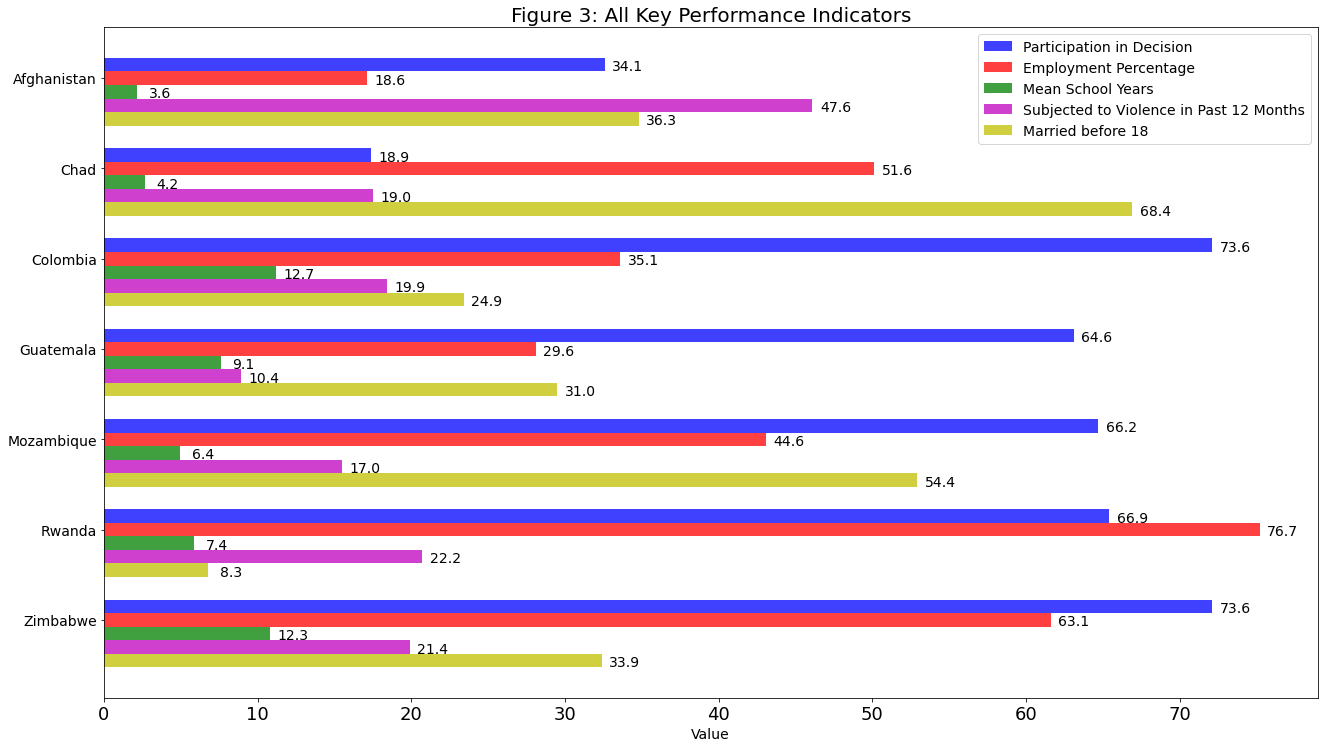

In [28]:
#####################
#### CREATE PLOT ####
#####################

n_groups = len(df)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.75

rects1 = plt.barh(index, df['Participation in Decision'], bar_width,
alpha=opacity,
color='b',
label='Participation in Decision')

rects2 = plt.barh(index + bar_width, df['Employment Rate']*100, bar_width,
alpha=opacity,
color='r',
label='Employment Percentage')

rects3 = plt.barh(index + 2*bar_width, df['Mean School Years'], bar_width,
alpha=opacity,
color='g',
label='Mean School Years')


rects4 = plt.barh(index + 3*bar_width, df['Subject to Violence'], bar_width,
alpha=opacity,
color='m',
label='Subjected to Violence in Past 12 Months')

rects5 = plt.barh(index + 4*bar_width, df['Married by 18'], bar_width,
alpha=opacity,
color='y',
label='Married before 18')


plt.xlabel('Value',fontsize=14)
plt.title('Figure 3: All Key Performance Indicators' ,fontsize=20)
plt.xticks(fontsize=18 )
plt.yticks(index + bar_width,df['index'],fontsize=14)
plt.legend(fontsize=14)
ax.invert_yaxis() 


#######################################
### ADDING VALUE LABELS TO BAR PLOT ###
#######################################

def add_value_labels_h(ax, spacing=5): # parameters adjusted for horizontal bar plot
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width() + 1.5
        y_value = rect.get_y() + rect.get_height() 

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'center'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1.5
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(x_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            fontsize=14,                # Label fontsize
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
##############
#### PLOT ####
##############
# Call the function above. 
add_value_labels_h(ax)

plt.tight_layout()
plt.show()


The bars in figure 3 give us insights regarding the performance of each country. For example, we can see that:
- **Zimbabwe** seems to be performing well in women making decisions and employment. The average years of schooling is high and in par with countries of the first world. However, about 21.5% of women have been subjected to violence and 34% of women were married by the age of 18.
- Women in **Afghanistan** seem to have matters worse than the rest of the countries. Only 34% of women participate in household-related decisions and employment rate is only 18.6%. Females spend only an average of 3.6 years in school and 47.6% have been subjected to violence in the past 12 months.

It would also be helpful to see for each key indicator, which country performed best and which performed worst.

In [29]:
# Get index of the country with the max value of each variable and convert to list 
MaxValue = df[['Participation in Decision', 'Subject to Violence', 'Married by 18', 'Mean School Years',
       'Employment Rate']].idxmax(axis=0).tolist()
# Access the name of the relevant country from index and put in list
MaxValue_Country= df.loc[MaxValue]['index'].tolist()

# Get index of the country with the min value of each variable and convert to list 
MinValue = df[['Participation in Decision', 'Subject to Violence', 'Married by 18', 'Mean School Years',
       'Employment Rate']].idxmin(axis=0).tolist()
# Access the name of the relevant country from index and put in list
MinValue_Country= df.loc[MinValue]['index'].tolist()

# Get list of variable names
Vars = list(df.columns) 
# Leave first column 'index' out
Vars = (Vars[1:])


## for bold text
start = "\033[1m"
end = "\033[0;0m"

for i in range(len(Vars)):
    print("For the variable {}, the highest was {} and the lowest was {}.".format(start+Vars[i]+end, start+MaxValue_Country[i]+end, start+MinValue_Country[i]+end))

    

For the variable Participation in Decision, the highest was Colombia and the lowest was Chad.
For the variable Subject to Violence, the highest was Afghanistan and the lowest was Guatemala.
For the variable Married by 18, the highest was Chad and the lowest was Rwanda.
For the variable Mean School Years, the highest was Colombia and the lowest was Afghanistan.
For the variable Employment Rate, the highest was Rwanda and the lowest was Afghanistan.


<a id='q3'></a>
### Question 3: Which indicator has the highest correlation with our variable of interest?

To examine correlations between our variables, we get the correlation matrix.

In [30]:
corrMatrix = df.corr()
print (corrMatrix)

                           Participation in Decision  Subject to Violence  \
Participation in Decision                   1.000000            -0.428602   
Subject to Violence                        -0.428602             1.000000   
Married by 18                              -0.634595            -0.077574   
Mean School Years                           0.822789            -0.462198   
Employment Rate                             0.264709            -0.355111   

                           Married by 18  Mean School Years  Employment Rate  
Participation in Decision      -0.634595           0.822789         0.264709  
Subject to Violence            -0.077574          -0.462198        -0.355111  
Married by 18                   1.000000          -0.477806        -0.226730  
Mean School Years              -0.477806           1.000000         0.195438  
Employment Rate                -0.226730           0.195438         1.000000  


To better explore the results, we plot the correlations visually.

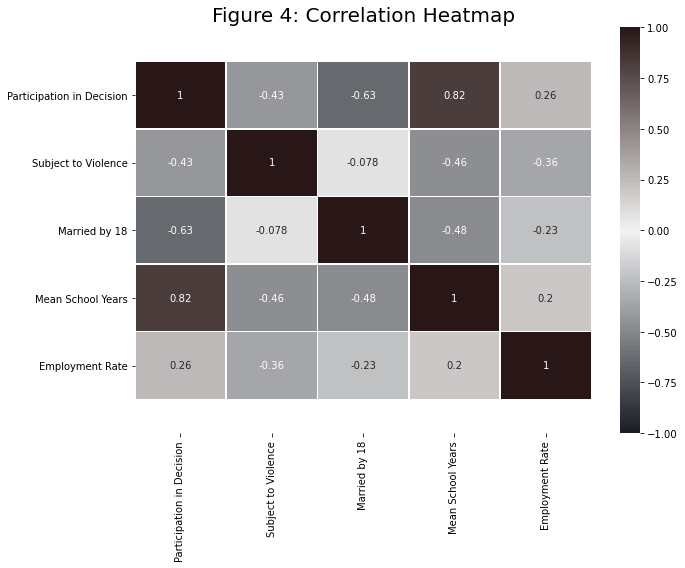

In [31]:
# Create a diverging palette for better visualization: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
cmap = sn.diverging_palette(250, 15, s=25, l=10, as_cmap=True)

# The plot
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, cmap=cmap, linewidths=.5)


# Workarourd to fix the cuttoff at top and bottom of plot
# source: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) value

plt.title('Figure 4: Correlation Heatmap' ,fontsize=20)

plt.tight_layout()
plt.show()

Figure 4 shows us the following:
- There appears to be a strong positive correlation between `participation in decision` and `mean school years`.
- There is a moderate negative correlation between `participation in decision` and `being married by 18`.
- There is also a moderate negative correlation between `participation in decision` and being `subject to violence`.

<a id='q4'></a>
### Question 4: How do the independent variables affect the variable of interest?

To answer this question, we perform a basic linear regression model with `Participation in Decision` as the dependent variable and the other variables as the independent variables. If the coefficients of regression are significant, we can make inferences about the magnitute of effect the independent variables have on the dependent variable.

In [32]:
# Regression using statsmodels: https://www.statsmodels.org/stable/index.html

model = sm.ols(formula="df['Participation in Decision']~df['Mean School Years'] + df['Subject to Violence'] + df['Married by 18'] + df['Employment Rate']", data=df).fit()
               
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     df['Participation in Decision']   R-squared:                       0.782
Model:                                         OLS   Adj. R-squared:                  0.347
Method:                              Least Squares   F-statistic:                     1.799
Date:                             Sat, 12 Sep 2020   Prob (F-statistic):              0.388
Time:                                     23:55:56   Log-Likelihood:                -25.523
No. Observations:                                7   AIC:                             61.05
Df Residuals:                                    2   BIC:                             60.77
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
                                coef    std err          t      P>|t|      [0.02

C:\Users\engia\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


The regression model shows that none of the coefficients is significant (all p-values > 0.05) which is expected given the extremely small number of observations. The coefficient values explain how much the independent variables change when the independent variable increases by one unit.

In the following, we do individual regression plots (i.e. scatter plots) to get a better understanding of how each of the independent variables relate to the response (i.e. the direction of the trend).

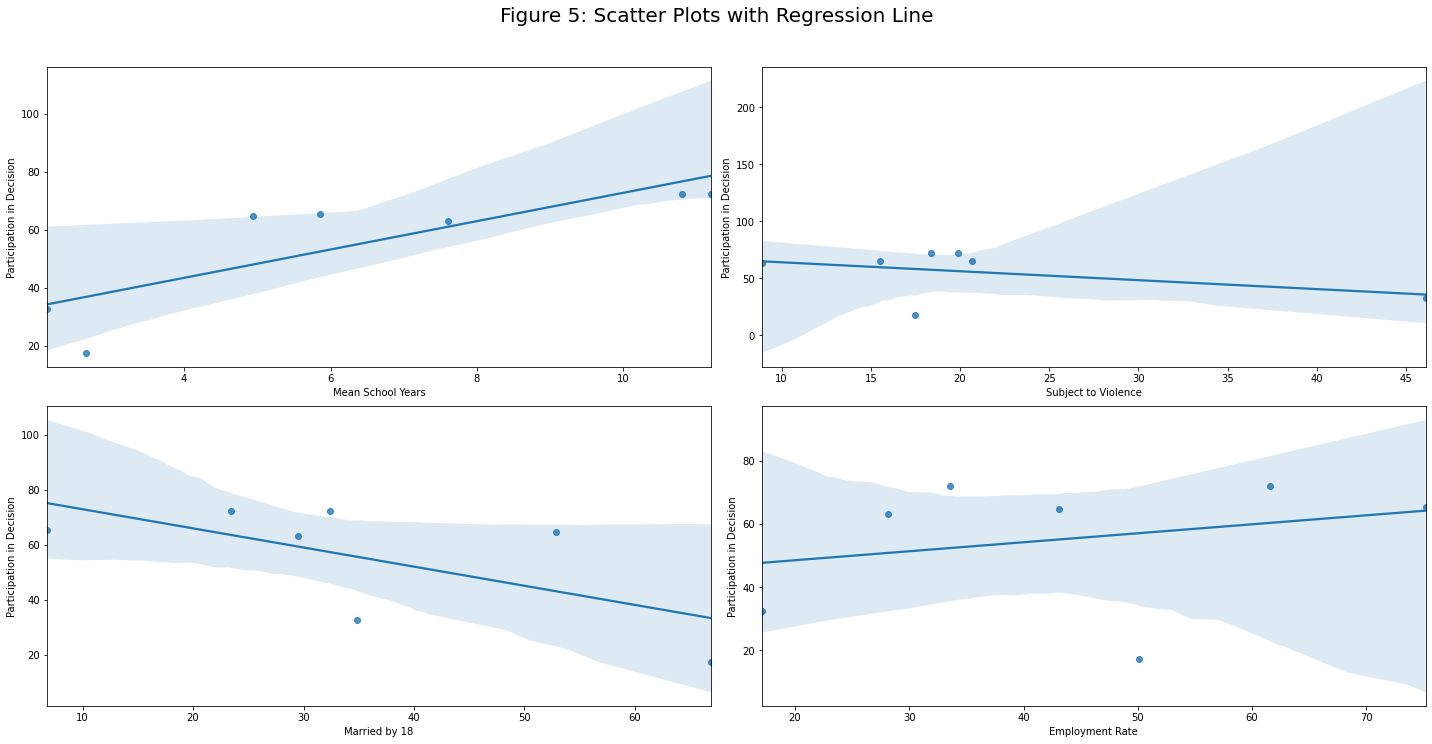

In [35]:
# Plot 4 subplots in one figure
fig, ax =plt.subplots(2,2)

fig.set_size_inches(20, 10.5)


sn.regplot(x= df['Mean School Years'], y=df['Participation in Decision'],ax=ax[0,0])
sn.regplot(x= df['Subject to Violence'], y=df['Participation in Decision'],ax=ax[0,1])
sn.regplot(x= df['Married by 18'], y=df['Participation in Decision'],ax=ax[1,0])
sn.regplot(x= df['Employment Rate']*100, y=df['Participation in Decision'],ax=ax[1,1])

plt.suptitle('Figure 5: Scatter Plots with Regression Line',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(top=0.90)

plt.show()

We can see that there is a positive trend between our response `Participation in Decision` and `Mean School Years`. Also between `Participation in Decision` and `Employment Rate`. On the other hand, our response variable has a negative trend with both `Subject to Violence` and `Married by 18`.

<a id='conclusions'></a>
## Conclusions
- Afghanistan seems to be doing the worst regarding women empowerment (highest subjection to violence, lowest years of schooling, and lowest employment rate).
- Colombia seems to be doing a relatively better job regarding the percentage of women participating in household-related decisions and schooling years.
- There is a positive relationship between participation in decisions and years spent in school and between participation in decisions and employment rate. An educated working woman is definitely going to have a voice regarding her decisions in the household.
- The is a negative relation between participation in decisions and subjection to violence and between participation in decisions and being married by the age of 18. An oppressed young woman is less likely to have a say in any life decision.

### Limitations
- The number of observations is too few. No significant results can be ever inferred.
- No time-series analysis were considered due to the unavailability of the data. It would have been very informative to see how the performance of countries progressed throughout the years.
- Only five indicators were considered. There are many more indicators set by the UN to measure women empowerment in countries.
- The country overall characteristics (such as population, GDP, economic and political atmosphere) were not taken into consideration. These factors could help explain the performance of the indicators under study.

### Future Recommendations
- Obtain larger quantities of data for more countries and more number of years.
- Include other key performance indicators.
- Gather information on internal or external factors that influences a country's performance regarding women empowerment.